# SMA Crossover Strategy
A simple moving average is the simplest form of a moving average. A moving average is a mean value calculated over a specific number of recent data points. This value is periodically re-calculated, kicking out the oldest value in favour of the most recent period. 

We calculate values using the simple moving average formula:

**Formula : SMA = (Sum of price values for n periods) / n**

The greater the value for n, the smoother our moving average line will be, but the slower it will react to changes in the price. Smaller values for n will produce a faster-moving SMA line. It will react quicker to changes in the price, but it will be less smooth. 

It can be useful to compare a faster (i.e. a shorter period) SMA with a slower (i.e. a longer period) one. Using shorter and longer period, we visualize it as signal on the plot which help us whether we should sell or buy the share. So, basically it helps in trading in the stock market.

**Trading Strategy: SMA Crossover**

The simple moving average crossover strategy is a fairly basic trend-following system. It looks at two different price series, and provides a trading signal when one crosses over the other. In the plot, we can see that the price crossing was above a 50-period moving average. As an alternative, we can also use another moving average instead of the price.

The key is that the direction of the signal is given by the direction of the cross of the faster-moving price series, over the slower one. So, for example, we might use a 50-period moving average as the fast series, and a 200-period moving average as the slower one. If the 50-period moving average *crossed above* the 200-period moving average, it would be a **buy signal**. If the 50-period moving average *crossed below* the slower moving average, it would be a **sell signal**.

# About Dataset

Data downloaded from kaggle.com. This data belong to the Google Stock price from 01/03/2012 ~ 12/30/2016 daily. There are 7 columns; Date, open, high, low, close and volume.

Date - in format: mm-dd-yy

Open - price of the stock at market open (USD)

High - Highest price reached in the day

Low Close - Lowest price reached in the day

Volume - Number of shares traded



**Importing Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Reading Dataset**

In [2]:
df = pd.read_csv('Google_Stock_Price_Train.csv')

df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


**Visualizing Dataset**

In [3]:
print(df.info)


<bound method DataFrame.info of             Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
5      1/10/2012  313.70  315.72  307.30  621.43   8,824,000
6      1/11/2012  310.59  313.52  309.40  624.25   4,817,800
7      1/12/2012  314.43  315.26  312.08  627.92   3,764,400
8      1/13/2012  311.96  312.30  309.37  623.28   4,631,800
9      1/17/2012  314.81  314.81  311.67  626.86   3,832,800
10     1/18/2012  312.14  315.82  309.90  631.18   5,544,000
11     1/19/2012  319.30  319.30  314.55  637.82  12,657,800
12     1/20/2012  294.16  294.40  289.76  584.39  21,231,800
13     1/23/2012  291.91  293.23  290.49  583.92   6,851,300
14     1/24/2012  292.07  292.74  287.92  579.34   6,

In [4]:
print(df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [5]:
print(df.describe())

              Open         High          Low
count  1258.000000  1258.000000  1258.000000
mean    533.709833   537.880223   529.007409
std     151.904442   153.008811   150.552807
min     279.120000   281.210000   277.220000
25%     404.115000   406.765000   401.765000
50%     537.470000   540.750000   532.990000
75%     654.922500   662.587500   644.800000
max     816.680000   816.680000   805.140000


Cleaning and Preparing Dataset

In [6]:
df['Close'] = df['Close'].str.replace(',','')

df.Close = df.Close.astype(float)

print(df.info)

<bound method DataFrame.info of             Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
5      1/10/2012  313.70  315.72  307.30  621.43   8,824,000
6      1/11/2012  310.59  313.52  309.40  624.25   4,817,800
7      1/12/2012  314.43  315.26  312.08  627.92   3,764,400
8      1/13/2012  311.96  312.30  309.37  623.28   4,631,800
9      1/17/2012  314.81  314.81  311.67  626.86   3,832,800
10     1/18/2012  312.14  315.82  309.90  631.18   5,544,000
11     1/19/2012  319.30  319.30  314.55  637.82  12,657,800
12     1/20/2012  294.16  294.40  289.76  584.39  21,231,800
13     1/23/2012  291.91  293.23  290.49  583.92   6,851,300
14     1/24/2012  292.07  292.74  287.92  579.34   6,

**Visualizing Real trend**

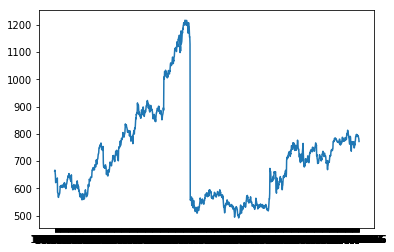

In [8]:
df1 = df.iloc[:,[0,4]]

df1.columns=['Date','Close']

plt.plot(df1.Date, df1.Close)

plt.show()

**Calculating SMA**

In [0]:
rolling_mean = df1.Close.rolling(window=50).mean()

rolling_mean2 = df1.Close.rolling(window=200).mean()

**Plotting SMA with real trend**

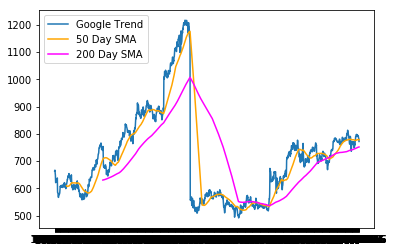

<Figure size 640x480 with 0 Axes>

In [14]:
plt.plot(df1.Date, df1.Close, label='Google Trend')
plt.plot(df1.Date, rolling_mean, label='50 Day SMA', color='orange')
plt.plot(df1.Date, rolling_mean2, label='200 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.figure(figsize=(8, 6), dpi=80)
plt.show()

In this plot orange trend is faster series and magenta is slower series. We can see here in the middle of this chart, 50-period moving average crossed below the slower moving average, it would be a **sell signal**.
But is too late to describe that.
In between 500-600, we can see 50-period moving average crossed above the slower moving average, it would be a **buy signal**.

**Calculating SMA with different period**

In [0]:
rolling_mean_ = df1.Close.rolling(window=20).mean()
rolling_mean2_ = df1.Close.rolling(window=100).mean()

**Plotting SMA with different period**

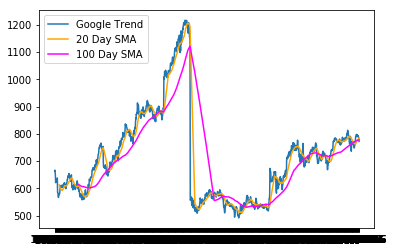

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(df1.Date, df.Close, label='Google Trend')
plt.plot(df1.Date, rolling_mean_, label='20 Day SMA', color='orange')
plt.plot(df1.Date, rolling_mean2_, label='100 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.figure(figsize=(8, 6), dpi=80)
plt.show()

In this plot also orange trend is faster series and magenta is slower series. We can see here in the middle of this chart, 50-period moving average crossed below the slower moving average, it would be a **sell signal**.
And it is better than before, it is more reactive.
In between 500-600, we can see 50-period moving average crossed above the slower moving average, it would be a **buy signal**.

# Thanks